# Guided Project: Clean And Analyze Employee Exit Surveys

## 1.Introduction

> #### Goals of the project

>In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

>* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
>* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

#### Data description

Below is a preview of a couple columns we'll work with from the **dete_survey.csv**:

**ID:** An id used to identify the participant of the survey.  
**SeparationType:** The reason why the person's employment ended.  
**Cease Date:** The year or month the person's employment ended.  
**DETE Start Date**: The year the person began employment with the DETE.  
  
Below is a preview of a couple columns we'll work with from the **tafe_survey.csv:**  
  
**Record ID:** An id used to identify the participant of the survey.  
**Reason for ceasing employment:** The reason why the person's employment ended.  
**LengthofServiceOverall. Overall Length of Service at Institute (in years):** The length of the person's employment (in years)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


#### A brief summary of both data sets

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [5]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [9]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [10]:
dete_survey['Job dissatisfaction'].value_counts()

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [11]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

#### Findings so far

* The *dete_survey* dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.  
<br>
* Both the *dete_survey* and *tafe_survey* dataframes contain many columns that we don't need to complete our analysis.  
<br>  
* Each dataframe contains many of the same columns, but the column names are different.  
<br>  
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## 2.Identify Missing Values and Drop Unnecessary Columns

To start, we'll handle the first two issues. 
<br>  
We can use the `pd.read_csv()` function to specify values that should be represented as `NaN`. We'll use this function to fix the missing values first. 
  
  Then, we'll drop columns we know we don't need for our analysis.

In [12]:
dete_survey = pd.read_csv('dete_survey.csv', 
                          na_values = 'Not Stated')

In [13]:
y = enumerate(dete_survey.columns)
list(y)


[(0, 'ID'),
 (1, 'SeparationType'),
 (2, 'Cease Date'),
 (3, 'DETE Start Date'),
 (4, 'Role Start Date'),
 (5, 'Position'),
 (6, 'Classification'),
 (7, 'Region'),
 (8, 'Business Unit'),
 (9, 'Employment Status'),
 (10, 'Career move to public sector'),
 (11, 'Career move to private sector'),
 (12, 'Interpersonal conflicts'),
 (13, 'Job dissatisfaction'),
 (14, 'Dissatisfaction with the department'),
 (15, 'Physical work environment'),
 (16, 'Lack of recognition'),
 (17, 'Lack of job security'),
 (18, 'Work location'),
 (19, 'Employment conditions'),
 (20, 'Maternity/family'),
 (21, 'Relocation'),
 (22, 'Study/Travel'),
 (23, 'Ill Health'),
 (24, 'Traumatic incident'),
 (25, 'Work life balance'),
 (26, 'Workload'),
 (27, 'None of the above'),
 (28, 'Professional Development'),
 (29, 'Opportunities for promotion'),
 (30, 'Staff morale'),
 (31, 'Workplace issue'),
 (32, 'Physical environment'),
 (33, 'Worklife balance'),
 (34, 'Stress and pressure support'),
 (35, 'Performance of supervis

In [14]:
x = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns = x)
list(enumerate(dete_survey_updated.columns))

[(0, 'ID'),
 (1, 'SeparationType'),
 (2, 'Cease Date'),
 (3, 'DETE Start Date'),
 (4, 'Role Start Date'),
 (5, 'Position'),
 (6, 'Classification'),
 (7, 'Region'),
 (8, 'Business Unit'),
 (9, 'Employment Status'),
 (10, 'Career move to public sector'),
 (11, 'Career move to private sector'),
 (12, 'Interpersonal conflicts'),
 (13, 'Job dissatisfaction'),
 (14, 'Dissatisfaction with the department'),
 (15, 'Physical work environment'),
 (16, 'Lack of recognition'),
 (17, 'Lack of job security'),
 (18, 'Work location'),
 (19, 'Employment conditions'),
 (20, 'Maternity/family'),
 (21, 'Relocation'),
 (22, 'Study/Travel'),
 (23, 'Ill Health'),
 (24, 'Traumatic incident'),
 (25, 'Work life balance'),
 (26, 'Workload'),
 (27, 'None of the above'),
 (28, 'Gender'),
 (29, 'Age'),
 (30, 'Aboriginal'),
 (31, 'Torres Strait'),
 (32, 'South Sea'),
 (33, 'Disability'),
 (34, 'NESB')]

In [15]:
list(enumerate(tafe_survey.columns))

[(0, 'Record ID'),
 (1, 'Institute'),
 (2, 'WorkArea'),
 (3, 'CESSATION YEAR'),
 (4, 'Reason for ceasing employment'),
 (5, 'Contributing Factors. Career Move - Public Sector '),
 (6, 'Contributing Factors. Career Move - Private Sector '),
 (7, 'Contributing Factors. Career Move - Self-employment'),
 (8, 'Contributing Factors. Ill Health'),
 (9, 'Contributing Factors. Maternity/Family'),
 (10, 'Contributing Factors. Dissatisfaction'),
 (11, 'Contributing Factors. Job Dissatisfaction'),
 (12, 'Contributing Factors. Interpersonal Conflict'),
 (13, 'Contributing Factors. Study'),
 (14, 'Contributing Factors. Travel'),
 (15, 'Contributing Factors. Other'),
 (16, 'Contributing Factors. NONE'),
 (17, 'Main Factor. Which of these was the main factor for leaving?'),
 (18,
  'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction'),
 (19,
  'InstituteViews. Topic:2. I was given access to skills training to help me do my job better'),
 (20,
  'InstituteViews. Topi

In [16]:
t = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(labels = t, axis =1)
list(enumerate(tafe_survey_updated.columns))

[(0, 'Record ID'),
 (1, 'Institute'),
 (2, 'WorkArea'),
 (3, 'CESSATION YEAR'),
 (4, 'Reason for ceasing employment'),
 (5, 'Contributing Factors. Career Move - Public Sector '),
 (6, 'Contributing Factors. Career Move - Private Sector '),
 (7, 'Contributing Factors. Career Move - Self-employment'),
 (8, 'Contributing Factors. Ill Health'),
 (9, 'Contributing Factors. Maternity/Family'),
 (10, 'Contributing Factors. Dissatisfaction'),
 (11, 'Contributing Factors. Job Dissatisfaction'),
 (12, 'Contributing Factors. Interpersonal Conflict'),
 (13, 'Contributing Factors. Study'),
 (14, 'Contributing Factors. Travel'),
 (15, 'Contributing Factors. Other'),
 (16, 'Contributing Factors. NONE'),
 (17, 'Gender. What is your Gender?'),
 (18, 'CurrentAge. Current Age'),
 (19, 'Employment Type. Employment Type'),
 (20, 'Classification. Classification'),
 (21,
  'LengthofServiceOverall. Overall Length of Service at Institute (in years)'),
 (22,
  'LengthofServiceCurrent. Length of Service at curre

We have deleted useless columns from both data sets. For the `dete_survey` we used `drop(columns = list_for_deletion)`, while for `tafe_survey` we used the identical `drop(labels = list_for_deletion, axis = 1)`

## 3. Clean Column Names

Each dataframe contains many of the same columns, but the column names are different.  
  
Because we eventually want to combine them, we'll have to standardize the column names. 
    
We can use the `DataFrame.columns` attribute along with vectorized string methods to update all of the columns at once. 

First we standardize the column names in the `dete_survey` data set by transforming them to lower case and substituting the spaces with underscores.

In [17]:
dete_survey_updated.columns=(dete_survey_updated.columns
                             .str.lower()
                             .str.strip()
                             .str.replace(' ','_')
                            )
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


Next we'll rename some of the columns in the `tafe_survey` data set.

In [18]:
mapping_dict = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
               }
tafe_survey_updated.rename(columns = mapping_dict, inplace = True)
tafe_survey_updated.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
id                                                     702 non-null float64
Institute                                              702 non-null object
WorkArea                                               702 non-null object
cease_date                                             695 non-null float64
separationtype                                         701 non-null object
Contributing Factors. Career Move - Public Sector      437 non-null object
Contributing Factors. Career Move - Private Sector     437 non-null object
Contributing Factors. Career Move - Self-employment    437 non-null object
Contributing Factors. Ill Health                       437 non-null object
Contributing Factors. Maternity/Family                 437 non-null object
Contributing Factors. Dissatisfaction                  437 non-null object
Contributing Factors. Job Dissatisfaction              437 non-null 

## 4.Filter the Data

In each of the dataframes we'll select only the data for survey respondents who have a `Resignation` separation type.

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
bln=dete_survey_updated['separationtype'].str.contains(r'[R,r]esignation')

dete_resignations = dete_survey_updated[bln].copy()
dete_resignations.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [22]:
dete_resignations['separationtype'].value_counts(dropna = False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated.dropna(inplace = True, subset = ['separationtype'])
bln_tafe=tafe_survey_updated['separationtype'].str.contains(r'[R,r]esignation')

tafe_resignations = tafe_survey_updated[bln_tafe].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'. Above we have selected only such cases and stored them in `dete_resignations` and `tafe_resignations` respectively.

## 5.Verify the Data

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

We'll verify that the years in the `cease_date` and `dete_start_date` columns make sense.

    First we'll clean the `cease_date` column in `dete_resignations` by leaving just the year and converting it to a float number.

In [24]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [25]:
y = dete_resignations['cease_date'].str[-4:]
dete_resignations['cease_date'] = y.astype('float')



In [26]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

    Next we clean the `dete_start_date` in `dete_resignations`

In [27]:
dete_start_date = dete_resignations['dete_start_date'].value_counts().sort_index(ascending = True)
dete_start_date

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

    The `dete_start_date` data seems fine.
    
    Next we clean the `cease_date` column in `tafe_resignations`.
    

In [28]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [29]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

##### Conclusions from step #5

There aren't any major issues with the years.
The years in each dataframe don't span quite the same number of years.

## 6. Create a New Column

In [30]:
dete_resignations['institute_service'] = (dete_resignations['cease_date']
                                - dete_resignations['dete_start_date']
                               )

In [31]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment.

## 7.Identify Dissatisfied Employees

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

In [32]:
tafe_resignations.info()
#['Contributing Factors. Dissatisfaction'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non-null object
Contributing Factors. Ill Health                       332 non-null object
Contributing Factors. Maternity/Family                 332 non-null object
Contributing Factors. Dissatisfaction                  332 non-null object
Contributing Factors. Job Dissatisfaction              332 non-null 

In [33]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [34]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [35]:
dete_dis = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload'
]]
dete_dis.head()


,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False


If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied ` in a new column.

In [36]:
def update_vals(txt):
    if pd.isnull(txt):
        return np.nan
    elif txt == '-':
        return False
    else: return True

In [37]:
tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [38]:
tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']].head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False


Next we use the `df.any()` method to create a `dissatisfied` column in BOTH the `tafe_resignations` and `dete_resignations` dataframes.

In [39]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                   'Contributing Factors. Job Dissatisfaction']].any(axis = 1, skipna = False)

In [40]:
tafe_resignations['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
dete_resignations['dissatisfied']= dete_dis.any(axis = 1, skipna = False)

In [42]:
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

Next we'll use the `df.copy()` method to create a copy of the results and avoid the `SettingWithCopy Warning`.

In [43]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [44]:
dete_resignations_up.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True


In [45]:
tafe_resignations_up.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


## 8. Combine the Data

>To recap, we've accomplished the following:

>* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column.

In [46]:
tafe_resignations_up['institute_service'].value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [47]:
dete_resignations_up['institute_service'].value_counts(dropna = False)

NaN      38
 5.0     23
 1.0     22
 3.0     20
 0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 12.0     6
 22.0     6
 17.0     6
 10.0     6
 14.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 39.0     3
 32.0     3
 19.0     3
 21.0     3
 36.0     2
 30.0     2
 25.0     2
 28.0     2
 26.0     2
 29.0     1
 42.0     1
 38.0     1
 27.0     1
 41.0     1
 35.0     1
 49.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service, dtype: int64

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.
* Add a column named `institute` to `dete_resignations_up`. Each row should contain the value DETE.
* Add a column named `institute` to `tafe_resignations_up`. Each row should contain the value TAFE.

In [48]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

Next we are going to:
* Combine the dataframes and assign the result to `combined`.
* Use the `DataFrame.dropna()` method to drop any columns with less than 500 non null values.

In [49]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                    ignore_index = True)

In [50]:
combined_updated = combined.dropna(thresh = 500)

## 9.Clean the Service Column

Now that we've combined our dataframes, we're almost at a place where we can perform some kind of analysis! First, though, we'll have to clean up the `institute_service column`. This column currently contains values in a couple different forms.

To analyze the data, we'll convert these numbers into categories. We'll base our analysis on this article, which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company
  
Let's categorize the values in the `institute_service` column using the definitions above.

First, we'll extract the years of service from each value in the `institute_service` column.

In [51]:
combined['institute_service'] = combined['institute_service'].astype('str')


In [52]:
combined['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
22.0                   6
17.0                   6
10.0                   6
12.0                   6
14.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
28.0                   2
30.0                   2
36.0                   2
26.0                   2


In [53]:
combined['institute_service'] = combined['institute_service'].str.replace(pat = '-',
                                                                     repl = '.')

In [54]:
combined['institute_service'] = combined['institute_service'].str.replace(pat = 'Less than 1 year',
                                                                     repl = '1').str.replace(pat = 'More than 20 years',
                                                                                            repl = '20')

In [55]:
combined['institute_service']=combined['institute_service'].str.split('.')

In [56]:
combined['institute_service']=combined['institute_service'].str[0]

In [57]:
combined['institute_service']=combined['institute_service'].astype('float')

Now the `institute_service` column contins the years of service in a `float` format and we can create a function to map them into the categories we defined above.

In [58]:
def categ(y):
    if pd.isnull(y):
        return 'NaN'
    elif y<3:
        return '0 - 3'
    elif 3 <=y <= 6:
        return '3 - 6'
    elif  7 <= y <= 10:
        return '7 - 10'
    else:
        return '11 +'

Next we apply the `categ` function to the `institute_service` column and assign the result to a new column named `service_cat`.

In [59]:
combined['service_cat'] = combined['institute_service'].apply(categ)

In [60]:
combined['service_cat'].value_counts(dropna = False)

0 - 3     193
3 - 6     172
11 +      136
NaN        88
7 - 10     62
Name: service_cat, dtype: int64

## 10.Perform Initial Analysis

In [61]:
combined['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We'll use the `DataFrame.fillna()` method to replace the missing values in the `dissatisfied` column with the value that occurs most frequently in this column, either - i.e. False.

In [62]:
m = combined['dissatisfied'].mode()
combined['dissatisfied'] = combined['dissatisfied'].fillna(m[0])


In [63]:
m[0]

False

In [64]:
combined['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Next we use the `DataFrame.pivot_table()` method to calculate the percentage of dissatisfied employees in each `service_cat` group.

In [65]:
pivot = pd.pivot_table(combined, values = 'dissatisfied', 
               index = 'service_cat', aggfunc = 'mean')


In [66]:
pivot

,dissatisfied
service_cat,
0 - 3,0.295337
11 +,0.485294
3 - 6,0.343023
7 - 10,0.516129
NaN,0.295455


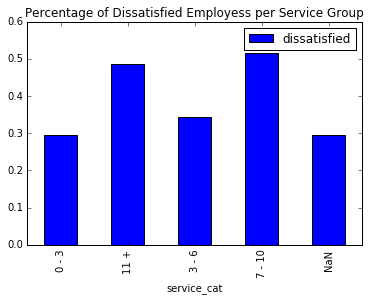

In [67]:
%matplotlib inline
pivot.plot(kind = 'bar', title = 'Percentage of Dissatisfied Employess per Service Group')

>Preliminary results show that the longer the service time - the higher the percentage of dissatisfaction for resigning employees.

## 11.Next Steps

In [136]:
# combined['service_cat'].isna()
# combined.loc[combined['service_cat'] == 'NaN' ,['institute', 'age','cease_date','role_start_date', 'role_service' ]]
# combined.info()
# combined.loc[combined['institute'] == 'DETE','age'].value_counts(dropna = False).sort_index()
table = combined.pivot_table(values = 'dissatisfied',
              index = ['institute','age','service_cat'], 
                        aggfunc = 'count', 
                        margins = True)

In [137]:
table

dissatisfied
institute age           service_cat              
DETE      20 or younger 0 - 3                   1
          21-25         0 - 3                  16
                        3 - 6                   9
                        7 - 10                  1
          26-30         0 - 3                   6
                        3 - 6                  18
                        7 - 10                  7
          31-35         0 - 3                   5
                        11 +                    3
                        3 - 6                  12
                        7 - 10                  9
          36-40         0 - 3                  11
                        11 +                   10
                        3 - 6                  10
                        7 - 10                  5
          41-45         0 - 3                   8
                        11 +                   19
                        3 - 6                  11
                        7 - 10                  6
          46-50         0 - 3                   4
                        11 +                   18
                        3 - 6                   6
                        7 - 10                  6
          51-55         0 - 3                   3
                        11 +                   18
                        3 - 6                   6
                        7 - 10                  3
          56-60         0 - 3                   1
                        11 +                   17
                        3 - 6                   2
...                                           ...
TAFE      20 or younger 3 - 6                   3
          21  25        0 - 3                  21
                        3 - 6                  12
          26  30        0 - 3                  19
                        3 - 6                   9
                        7 - 10                  4
          31  35        0 - 3                  19
                        11 +                    2
                        3 - 6                   8
                        7 - 10                  3
          36  40        0 - 3                  12
                        11 +                    4
                        3 - 6                  11
                        7 - 10                  5
          41  45        0 - 3                  22
                        11 +                    5
                        3 - 6                  18
          46  50        0 - 3                  15
                        11 +                    4
                        3 - 6                  15
                        7 - 10                  5
          51-55         0 - 3                  19
                        11 +                    7
                        3 - 6                  10
                        7 - 10                  3
          56 or older   0 - 3                   4
                        11 +                   14
                        3 - 6                  10
                        7 - 10                  1
All                                           561

[65 rows x 1 columns]

In [70]:
table2 = combined[combined['institute'] == 'DETE'].groupby(['age', 'service_cat'])['dissatisfied'].count()

In [71]:
table2

age            service_cat
20 or younger  0 - 3           1
21-25          0 - 3          16
               3 - 6           9
               7 - 10          1
               NaN             3
26-30          0 - 3           6
               3 - 6          18
               7 - 10          7
               NaN             4
31-35          0 - 3           5
               11 +            3
               3 - 6          12
               7 - 10          9
36-40          0 - 3          11
               11 +           10
               3 - 6          10
               7 - 10          5
               NaN             5
41-45          0 - 3           8
               11 +           19
               3 - 6          11
               7 - 10          6
               NaN             4
46-50          0 - 3           4
               11 +           18
               3 - 6           6
               7 - 10          6
               NaN             8
51-55          0 - 3           3
               1

In [72]:
table.groupby(level = 0).apply(max)

,dissatisfied
age,
20 or younger,1
21-25,16
26-30,18
31-35,12
36-40,11
41-45,19
46-50,18
51-55,18
56-60,17


In [73]:
table.groupby(level = 0).max()

,dissatisfied
age,
20 or younger,1
21-25,16
26-30,18
31-35,12
36-40,11
41-45,19
46-50,18
51-55,18
56-60,17


In [74]:
idxm = table2.groupby(level = 0).idxmax()

In [75]:
idxm

age
20 or younger    (20 or younger, 0 - 3)
21-25                    (21-25, 0 - 3)
26-30                    (26-30, 3 - 6)
31-35                    (31-35, 3 - 6)
36-40                    (36-40, 0 - 3)
41-45                     (41-45, 11 +)
46-50                     (46-50, 11 +)
51-55                     (51-55, 11 +)
56-60                     (56-60, 11 +)
61 or older         (61 or older, 11 +)
Name: dissatisfied, dtype: object

In [76]:
idxm_df = idxm.apply(pd.Series)
idxm_df.columns = ['age','service_cat']
idxm_df

,age,service_cat
age,,
20 or younger,20 or younger,0 - 3
21-25,21-25,0 - 3
26-30,26-30,3 - 6
31-35,31-35,3 - 6
36-40,36-40,0 - 3
41-45,41-45,11 +
46-50,46-50,11 +
51-55,51-55,11 +
56-60,56-60,11 +


In [122]:
merge1 = combined.merge(right = idxm_df, on = 'age', 
                        how = 'left', suffixes = ['_orig', '_derived'])

In [134]:
combined[combined['age'].isnull()]['service_cat'].value_counts(dropna = False)

NaN      86
11 +      1
0 - 3     1
Name: service_cat, dtype: int64